###**Task-3 To explore Unsupervised learning**
*From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.*

In [25]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
#Loading data set


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
%cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [28]:
data_set=pd.read_csv("Iris.csv")
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Information about the data set**

*Column Id is not so relevant hence we delete it.*

In [29]:
data_set.drop(labels='Id',axis=1,inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### **Checking for Outliers to optmize the output**
***Box Plots are best for visualizing outliers***
*Brief function of Box Plot - Bottom black horizontal line of green box plot is  minimum value.
First black horizontal line of rectangle shape of green box plot is First quartile or 25%.
Second black horizontal line of rectangle shape of green box plot is Second quartile or 50% or median.
Third black horizontal line of rectangle shape of green box plot is third quartile or 75%.
Top black horizontal line of rectangle shape of green box plot is maximum value.
Small diamond shape of green box plot is outlier data or erroneous data.*

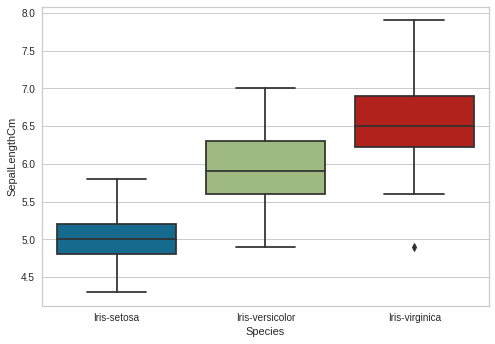

In [30]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data_set)

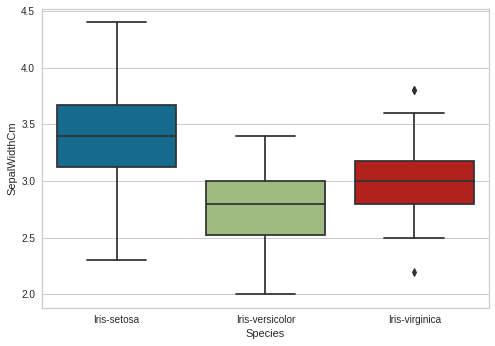

In [31]:
sns.boxplot(x="Species",y="SepalWidthCm",data=data_set)

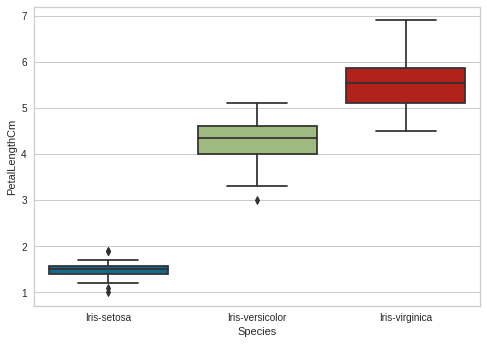

In [32]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data_set)

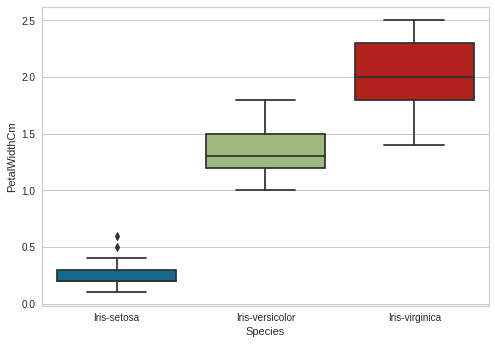

In [33]:
sns.boxplot(x="Species",y="PetalWidthCm",data=data_set)

##**Label Encoding Species**
*Now since there are multiple labels in species column , Inorder to make it easy for machine to distingush between several species we perform label encoding.*

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_set['Encoded-Species']=encoder.fit_transform(data_set['Species'])
data_set['Encoded-Species'].unique()

array([0, 1, 2])

###**Feature Scaling and Removing Outliers**
*Feature Scaling is a primitive step in pre-processing , performing feature scaling will ensure our model doesn't tend to make wrong predictions.Feature scaling will scale all the features in iris-data set(PetalLength, PetalWidth, SepalLength, SepalWidth) onto a fixed range so that no feature dominates another while prediction of a new data-point.*

In [35]:
data_set['Check_Outliers']=pd.cut(data_set['SepalLengthCm'],5)
data_set[['Check_Outliers','SepalLengthCm']].groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,SepalLengthCm
0,"(4.296, 5.02]",32
1,"(5.02, 5.74]",41
2,"(5.74, 6.46]",42
3,"(6.46, 7.18]",24
4,"(7.18, 7.9]",11


In [36]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler = scaler.fit(data_set[['SepalLengthCm']])
scaled_SPL = scaler.transform(data_set[['SepalLengthCm']])
data_set['Scaled SP Length']=scaled_SPL
data_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded-Species,Check_Outliers,Scaled SP Length
0,5.1,3.5,1.4,0.2,Iris-setosa,0,"(5.02, 5.74]",0.222222
1,4.9,3.0,1.4,0.2,Iris-setosa,0,"(4.296, 5.02]",0.166667
2,4.7,3.2,1.3,0.2,Iris-setosa,0,"(4.296, 5.02]",0.111111
3,4.6,3.1,1.5,0.2,Iris-setosa,0,"(4.296, 5.02]",0.083333
4,5.0,3.6,1.4,0.2,Iris-setosa,0,"(4.296, 5.02]",0.194444


In [37]:
data_set.drop(labels='Check_Outliers',axis=1,inplace=True)
data_set['Check_Outliers']=pd.cut(data_set['Scaled SP Length'],5)
data_set[['Check_Outliers','Scaled SP Length']].groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,Scaled SP Length
0,"(-0.001, 0.2]",32
1,"(0.2, 0.4]",41
2,"(0.4, 0.6]",42
3,"(0.6, 0.8]",24
4,"(0.8, 1.0]",11


In [38]:
lower_bound=0.1
upper_bound=0.95

limit_to_bounds=data_set['SepalLengthCm'].quantile([lower_bound,upper_bound])
limit_to_bounds

0.10    4.800
0.95    7.255
Name: SepalLengthCm, dtype: float64

In [39]:
considerable_data=(data_set['SepalLengthCm']<limit_to_bounds.loc[upper_bound])
considerable_data.value_counts()

True     142
False      8
Name: SepalLengthCm, dtype: int64

###**Final Data set without Outliers**

In [40]:
final_data=data_set[considerable_data].copy()
final_data.shape

(142, 8)

###**Checking Count of the Present Species**

In [41]:
final_data['Encoded-Species'].value_counts()

1    50
0    50
2    42
Name: Encoded-Species, dtype: int64

###**Data Distribution Species Wise**

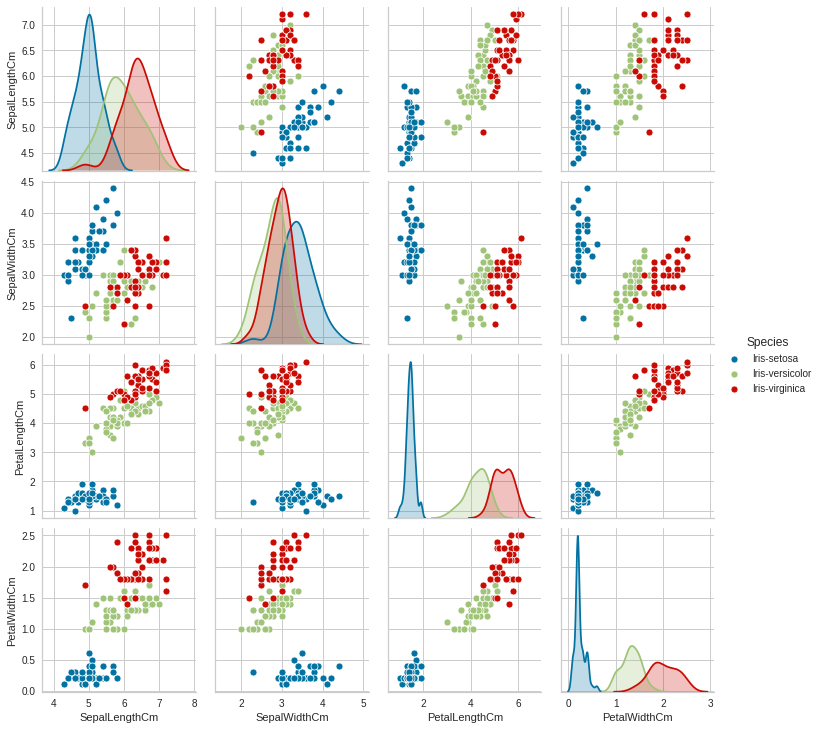

In [42]:
sns.pairplot(final_data.iloc[:,[0,1,2,3,4]],hue='Species')

### **Finding Value of Optimal K Using K-Elbow Visualizer**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a8d24cc18>,
                 k=None, metric=None, model=None, timings=True)

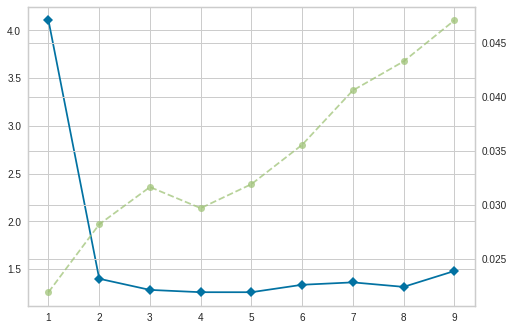

In [43]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
model1 = KMeans() 
visualizer = KElbowVisualizer(model1, k=(1,10)) 
visualizer.fit(final_data.iloc[:,[0,1,2,3]])

### **Visualizing Silhoutte Co-efficient using K=3**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a8d1740b8>,
                     model=None)

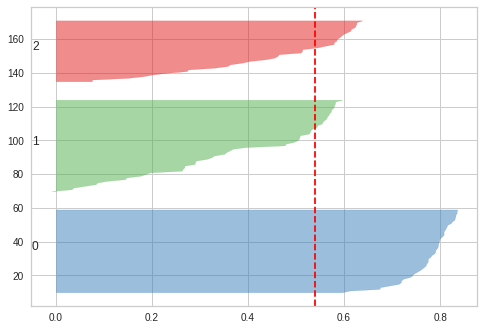

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer
model2 = KMeans(3)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(final_data.iloc[:,[0,1,2,3]])


### **Fixing n_clusters=3 and fitting the data to KMeans Model**

In [45]:
from sklearn.cluster import KMeans
x = final_data.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

###**Visualizing Clusters Based on First two Columns**

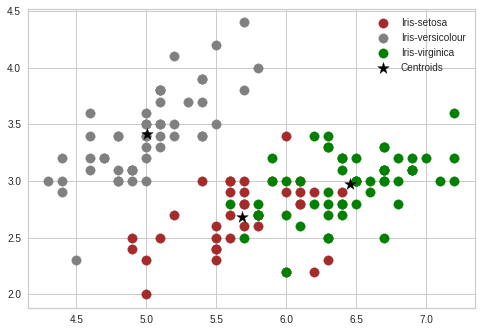

In [46]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 90, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 90, c = 'grey', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 90, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'black', label = 'Centroids',marker='*')


plt.legend()

###**Evaluating our Model Permformance**

In [47]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report

print('Confusion Matrix: \n')
print(confusion_matrix(y_kmeans,final_data.iloc[:,[5]]))
print('\nMean Absolute Error: ',mean_absolute_error(y_kmeans,final_data.iloc[:,[5]]))
print('\nAccuracy Score :',accuracy_score(y_kmeans,final_data.iloc[:,[5]]))
print('\nClassification Report:\n')
print(classification_report(y_kmeans,final_data.iloc[:,[5]]))

Confusion Matrix: 

[[ 0 36  1]
 [50  0  0]
 [ 0 14 41]]

Mean Absolute Error:  0.7183098591549296

Accuracy Score : 0.2887323943661972

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        50
           2       0.98      0.75      0.85        55

    accuracy                           0.29       142
   macro avg       0.33      0.25      0.28       142
weighted avg       0.38      0.29      0.33       142

